In [1]:
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100

# sklearn modules
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# def model_fit(m, X, y, plot = False):
#     """Returns the relative error (value between 0 and 1) of a fitted model based on provided X and y values.
    
#     Args:
#         m: sklearn model object
#         X: model matrix to use for prediction
#         y: outcome vector to use to calculating relative error and residuals
#         plot: boolean value, should fit plots be shown 
#     """
    
#     y_hat = m.predict(X)
        
#     rel_metric = np.mean(np.abs(np.exp(y) - np.exp(y_hat))/np.exp(y))
    
#     res = pd.DataFrame(
#         data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
#     )
    
#     if plot:
#         plt.figure(figsize=(12, 6))
        
#         plt.subplot(121)
#         sns.lineplot(x='x', y='y', color="grey", data =  pd.DataFrame(data={'x': [min(y),max(y)], 'y': [min(y),max(y)]}))
#         sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
#         plt.xlabel('Log(True Value)')
#         plt.ylabel('Log(Predicted Value)')
        
#         plt.subplot(122)
#         sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
#         plt.xlabel('Log(True Value)')
#         plt.ylabel('Log(Residual)')
# #         plt.subplots_adjust(left=0.0)
        
#         plt.suptitle("Model relative error = " + str(round(rel_metric, 4)), fontsize=16)
#         plt.savefig("forest_fit.png")
#         plt.show()
        
    
#     return rel_metric

In [ ]:
# data_path = '/home/s1997751/Documents/PhD/Year2/ibm_project/data_files/qmrxn/'
# data_set = pd.read_csv(data_path+"energies_coordinates.csv",index_col=0)

In [ ]:
# data_set.iloc[:,[67,71,75,79,83,87]] = data_set.iloc[:,[67,71,75,79,83,87]].astype('string')

In [ ]:
# element_cols = ['element_'+str(i) for i in range(21)]

# for col in element_cols:
#     tempdf = pd.get_dummies(data_set[col], prefix=col)
    
#     data_set = pd.merge(left=data_set,
#                         right=tempdf,
#                        left_index=True,
#                        right_index=True)
#     data_set.drop(columns=col, inplace=True)

# # data_set.head()

In [ ]:
# data_set.drop(columns=['label', 'reaction','number','method'],inplace=True)
# data_set['trans_state'] = np.where(data_set['geometry']== 'ts', True, False)
# data_set.drop(columns=['geometry'],inplace=True)

In [ ]:
# data_set.tail()

In [ ]:
# data_set.to_csv('/home/s1997751/Documents/PhD/Year2/ibm_project/data_files/qmrxn/ran_for_data.csv')

In [2]:
tempdata = np.load("/home/aidan/Documents/PhD/Year2/ibm_project/data_files/qmrxn/soap_transition_n1l0.npy", allow_pickle=True)
print(tempdata)

[[array([12.51491048,  6.30481369,  0.        ,  0.        ,  1.73301234,
          0.        ,  0.        ,  3.17626529,  0.        ,  0.        ,
          0.87306417,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.23998028,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ])
  1]
 [array([12.36535194,  6.15567276,  0.        ,  0.        ,  0.        ,
          1.29891412,  0.        ,  3.06439375,  0.        ,  0.        ,
          0.        ,  0.64662052,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.13644399,  0.        ,  0.        ])
  1]
 [array([9.46134418, 5.40201442, 0.        , 0.        , 1.39241335,
         1.14005774, 0.        , 3.08431437, 0.        , 0.        ,
         0.795

In [3]:
print(tempdata.shape)

(407848, 2)


In [4]:
data_set = np.array(tempdata[:,0].tolist())

data_y = np.array(tempdata[:,1].tolist())

In [5]:
data_set
# data_set = data_set.fillna(0)

array([[12.51491048,  6.30481369,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [12.36535194,  6.15567276,  0.        , ...,  0.13644399,
         0.        ,  0.        ],
       [ 9.46134418,  5.40201442,  0.        , ...,  0.13737283,
         0.        ,  0.        ],
       ...,
       [13.9323627 ,  5.14121963,  2.75964093, ...,  0.        ,
         0.        ,  0.        ],
       [13.9323627 ,  5.14121963,  2.75964093, ...,  0.        ,
         0.        ,  0.        ],
       [13.9323627 ,  5.14121963,  2.75964093, ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
data_y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
X = data_set
y = data_y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=100)

In [8]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)   
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [9]:
y_predict = rf_clf.predict(X_test)

In [ ]:
print(y_predict)
print(y_test)

In [10]:
accuracy_score(y_test,y_predict)


0.999975481181807

In [ ]:
fig = plt.figure(figsize=(45, 30))
plot_tree(rf_clf.estimators_[0], 
          feature_names=X, 
          filled=True, rounded=True)

# plt.show()
# plt.savefig('tree')

In [11]:
importances = rf_clf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = sorted_indices
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[f],
                            importances[sorted_indices[f]]))

 1) 7                              0.104398
 2) 8                              0.080610
 3) 13                             0.074736
 4) 1                              0.068536
 5) 2                              0.060184
 6) 0                              0.057226
 7) 10                             0.049829
 8) 11                             0.041470
 9) 5                              0.035444
10) 4                              0.034185
11) 15                             0.032795
12) 12                             0.028901
13) 6                              0.028318
14) 3                              0.028219
15) 16                             0.026526
16) 14                             0.026231
17) 9                              0.025636
18) 22                             0.024030
19) 25                             0.023121
20) 18                             0.022463
21) 17                             0.020767
22) 20                             0.017417
23) 19                          

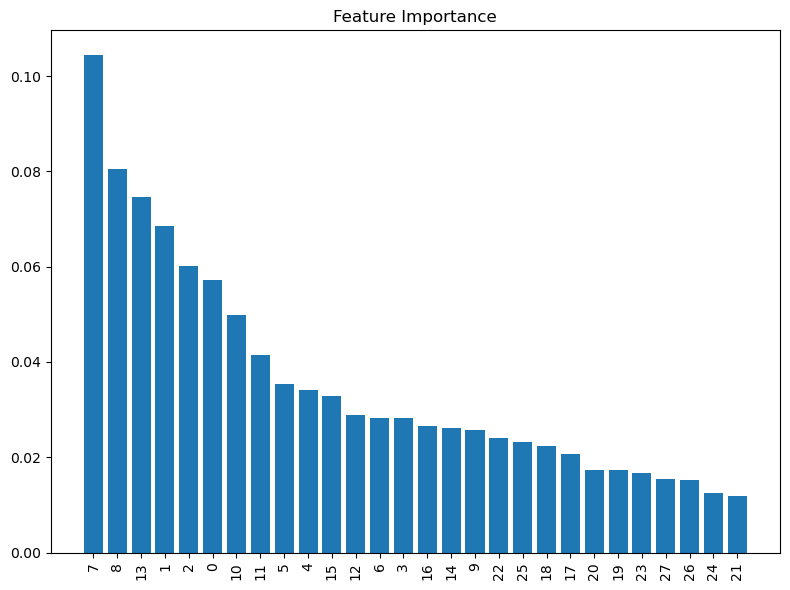

In [14]:
plt.title('Feature Importance')
num_feat = 28
plt.bar(range(num_feat), importances[sorted_indices][:num_feat], align='center')
plt.xticks(range(num_feat), feat_labels[:num_feat], rotation=90)
plt.tight_layout()
plt.savefig('SOAP_feature_impor.png')

In [ ]:
# estimator = RandomForestRegressor()
# param_grid = { 
#     "n_estimators"      : np.arange(50,401,25),
#     "max_features"      : ["sqrt"],
# #     "min_samples_split" : [2,4,8],
# #     "bootstrap"         : [True, False],
# #     "max_depth"         : np.arange(15, 25),
# #     "max_leaf_nodes"    : np.arange(10000, 50000, 5000)
#         }
# forest_gs = GridSearchCV(estimator, 
#                          param_grid,
# #                          n_jobs=2, 
#                          cv=KFold(5, shuffle=True, random_state=1234), 
#                          scoring="neg_root_mean_squared_error",
#                          verbose=3
# ).fit(
#     Xt, yt
# )
# forest_gs.best_params_

In [ ]:
# y_out = forest_gs.best_estimator_.predict(Xv)
# forest_gs.best_estimator_.score(Xv,yv)

In [ ]:
# print("forest rmse:", model_fit(forest_gs.best_estimator_, Xv, yv, plot=True))